In [9]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

In [18]:
# loading and reading the data path and saving as a variable
file_path = '/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/DLS_Plots/20231204_DLS_DIP_Serum10_CorrectSeqAddition_AW.xlsx'
sheet_name = "Sheet1"  

# reading and saving data from specific excel sheet
df = pd.read_excel(file_path, sheet_name="Sheet1")

In [19]:
# retrieving info from dataframe that I'll plot
#print(df)
polymer = df['Polymer']
diameter = df['Effective Diameter Avg.']
stdev = df['Stddev']

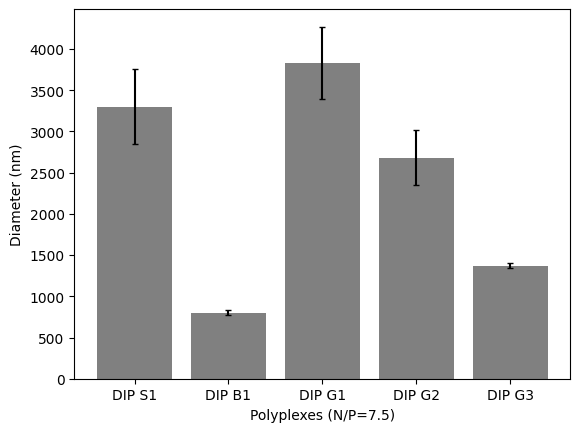

In [20]:
# use this plot for similarly sized polyplexes
plt.bar(polymer, diameter, yerr=stdev, capsize = 2, color='gray')
plt.xticks(df['Polymer'])
plt.xlabel('Polyplexes (N/P=7.5)')
plt.ylabel('Diameter (nm)')
plt.show()

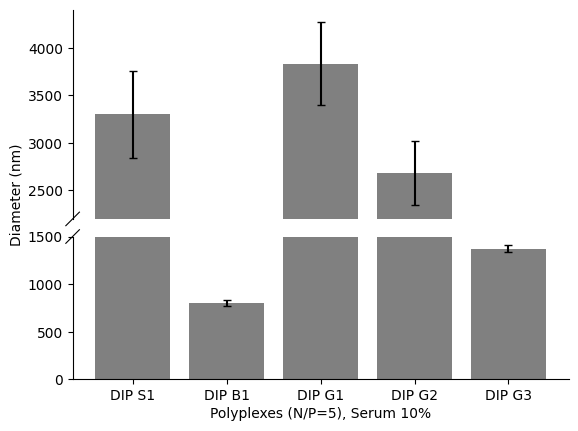

In [23]:
# use this plot for largely disperse polyplexes
bax = brokenaxes(ylims=((0, 1500), (2200, 4400)),  hspace=0.1)
bax.bar(polymer, diameter, yerr=stdev, capsize=3, color='gray')
bax.set_xticks(polymer)
bax.set_xlabel('Polyplexes (N/P=5), Serum 10%', labelpad=20)
bax.set_ylabel('Diameter (nm)', labelpad=35)

plt.show()